# Classifica√ß√£o de Bons e Maus Pagadores

Um cliente do setor financeiro forneceu um conjunto de dados contendo informa√ß√µes de diferentes clientes, com o objetivo de identificar bons e maus pagadores. Cada registro do dataset representa um cliente, descrito por diversas vari√°veis que indicam caracter√≠sticas financeiras e comportamentais, al√©m da indica√ß√£o se o cliente √© um bom pagador (classe 0) ou mau pagador (classe 1).

O cliente precisa de uma solu√ß√£o automatizada para classificar novos clientes em bons ou maus pagadores de forma eficaz, para otimizar processos de concess√£o de cr√©dito e minimizar riscos financeiros.

Por se tratar de decis√µes que envolvem dinheiro real e impacto direto nas opera√ß√µes da empresa, a solu√ß√£o deve atender aos seguintes requisitos essenciais:

- **Desempenho preditivo confi√°vel:** o modelo deve apresentar bom desempenho para garantir decis√µes adequadas em dados futuros.
- **Interpretabilidade:** o cliente exige que a solu√ß√£o seja compreens√≠vel, de modo que os analistas possam identificar quais caracter√≠sticas influenciam as decis√µes e justificar os resultados internamente e para √≥rg√£os reguladores.
- **Automa√ß√£o:** o processo deve ser automatizado, abrangendo desde o pr√©-processamento dos dados at√© a sele√ß√£o das vari√°veis mais relevantes e a constru√ß√£o do modelo final.

Sua tarefa √© desenvolver uma solu√ß√£o automatizada que atenda a esses objetivos.

A solu√ß√£o entregue deve conter c√≥digo completo, organizado e documentado, facilitando sua integra√ß√£o ao fluxo operacional do cliente.


# Trabalho Minera√ß√£o de Dados
**Nome:** Pedro Henrique Duarte **RA**: 812112 \\
**Nome:** Davi Mazocco **RA**: 811546 \\
**Nome:** Gabriel Flora Junqueira **RA**: 814106

## 1. Importando pacotes necess√°rios

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, mean_squared_error,r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

## 2. Importando e tratando a base de dados

In [ ]:
df = pd.read_csv("/content/dados.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
X=df.drop(columns=["class"])
Y=df["class"]


## 3. An√°lise descritiva das vari√°veis

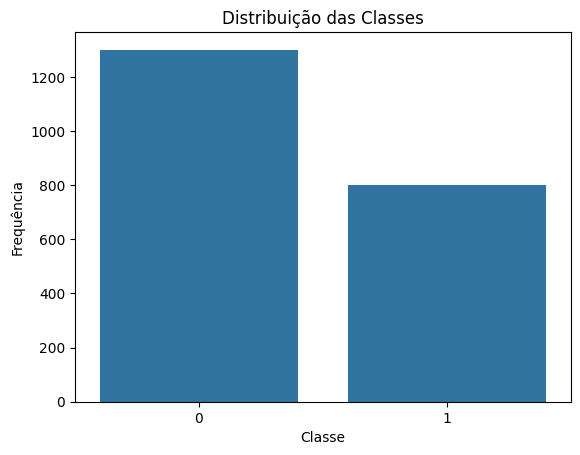

Distribui√ß√£o percentual:
class
0    61.904762
1    38.095238
Name: proportion, dtype: float64


In [ ]:
sns.countplot(x=Y)
plt.title("Distribui√ß√£o das Classes")
plt.xlabel("Classe")
plt.ylabel("Frequ√™ncia")
plt.show()

print("Distribui√ß√£o percentual:")
print(Y.value_counts(normalize=True) * 100)

Os dados n√£o s√£o desbalanceados

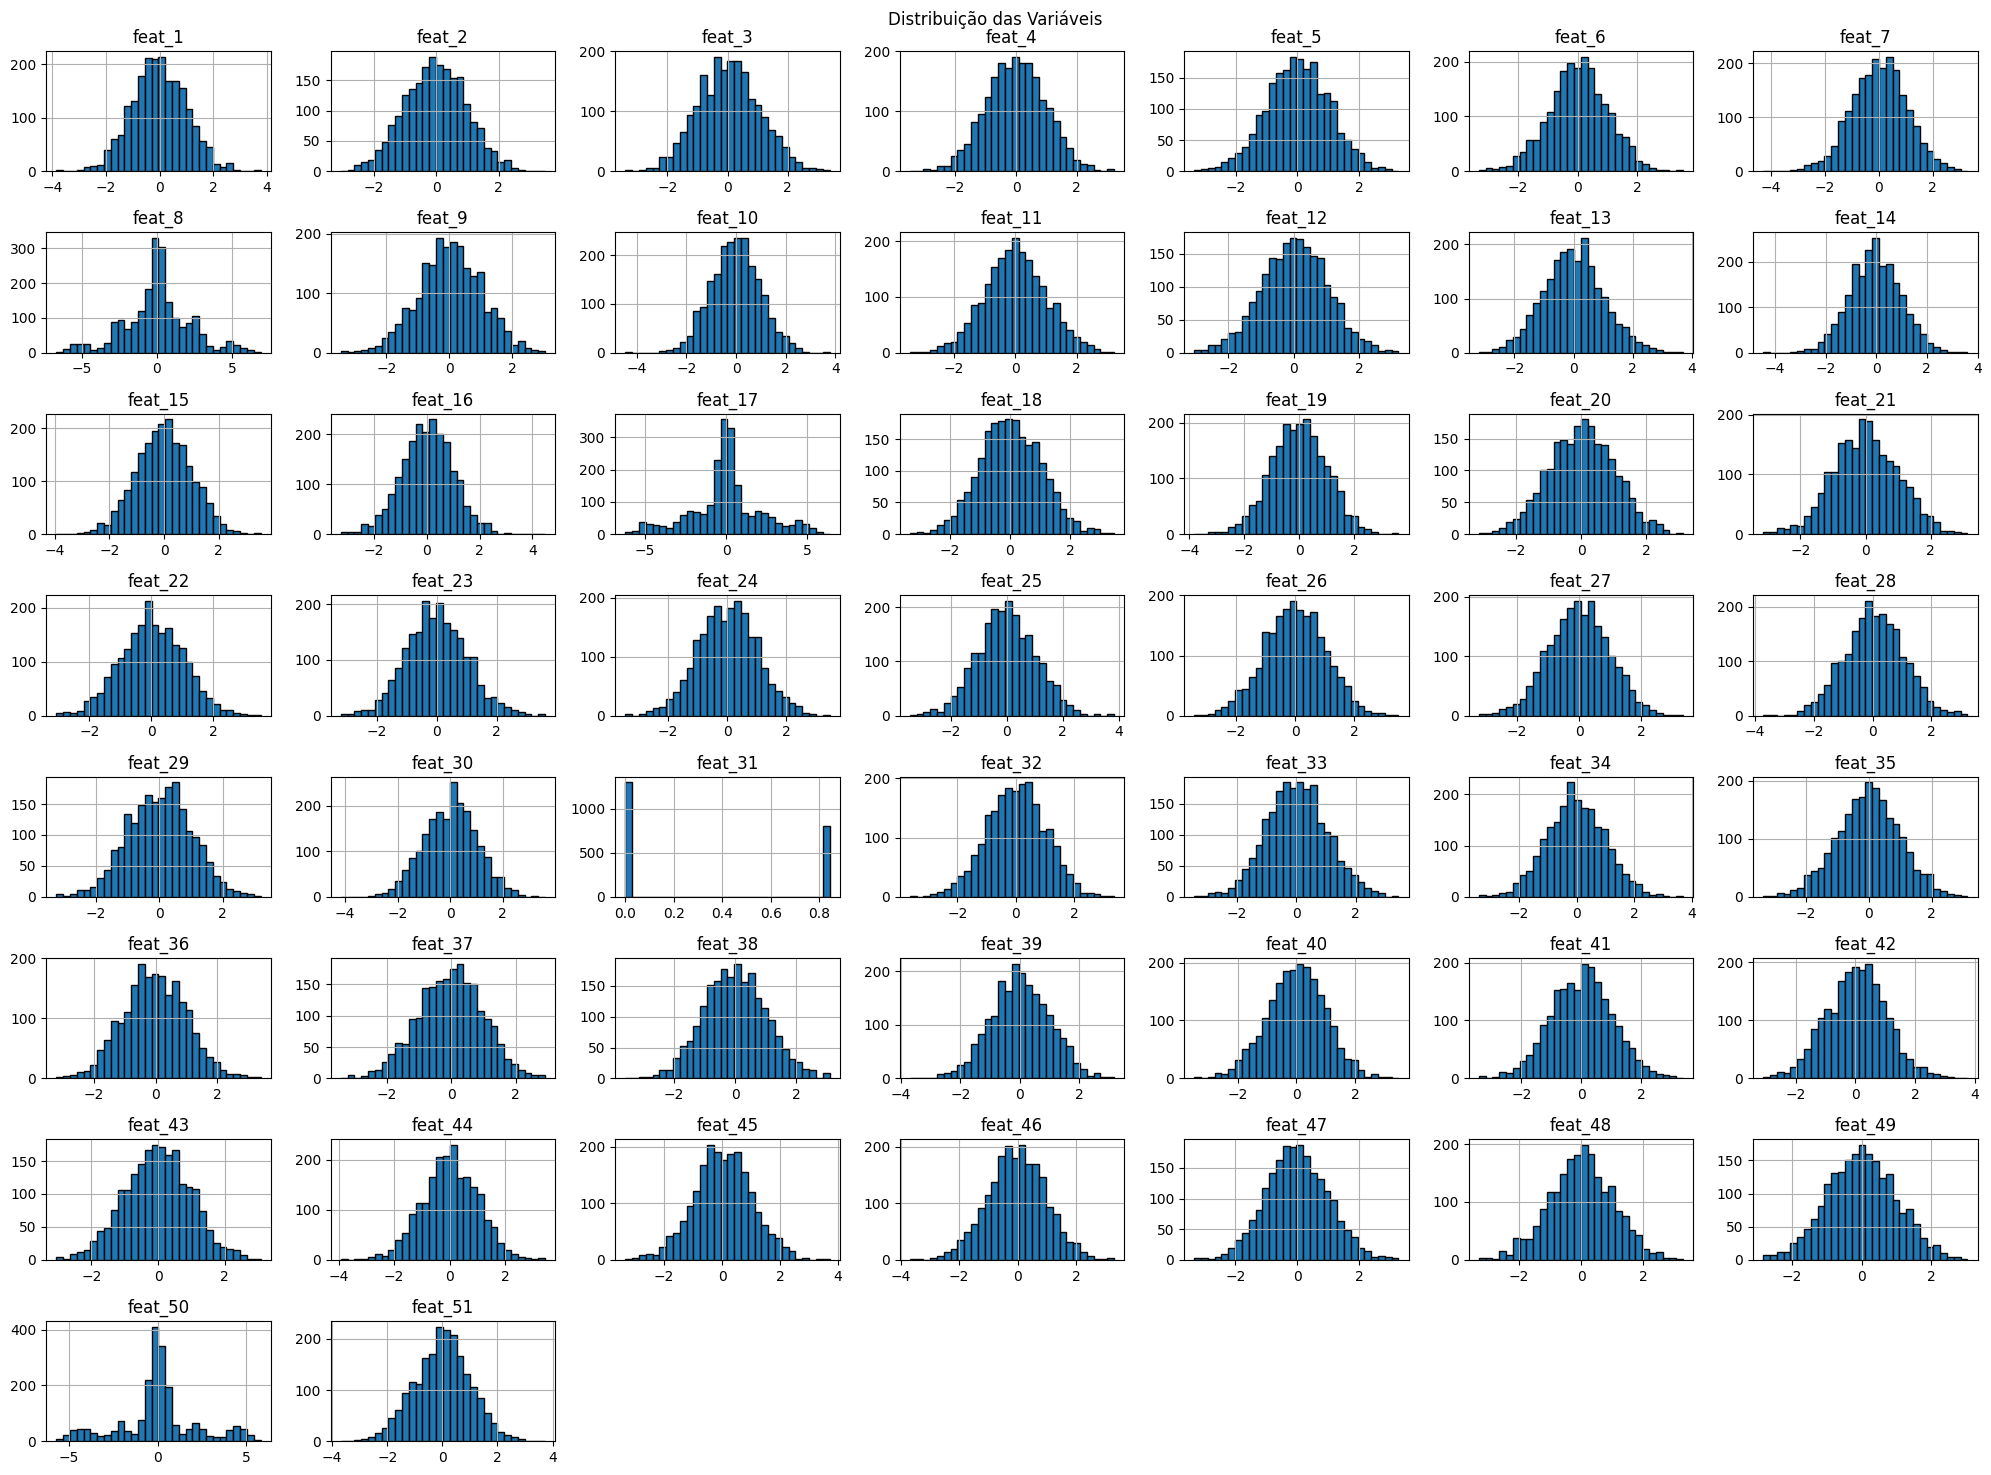

In [ ]:
X.hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.suptitle("Distribui√ß√£o das Vari√°veis")
plt.tight_layout()
plt.show()

A covari√°vel feat 31 aparenta ser bin√°ria, com valores 0 e 0.8472, aproximadamente; as covari√°veis feat 8, feat 17 e feat 50 possuem distribui√ß√µes semelhantes entre si e diferente das demais, com densidade sim√©trica e alta pr√≥ximo de 0. As demais aparentam seguir uma distribui√ß√£o Normal com m√©dia 0 e vari√¢ncia 1.

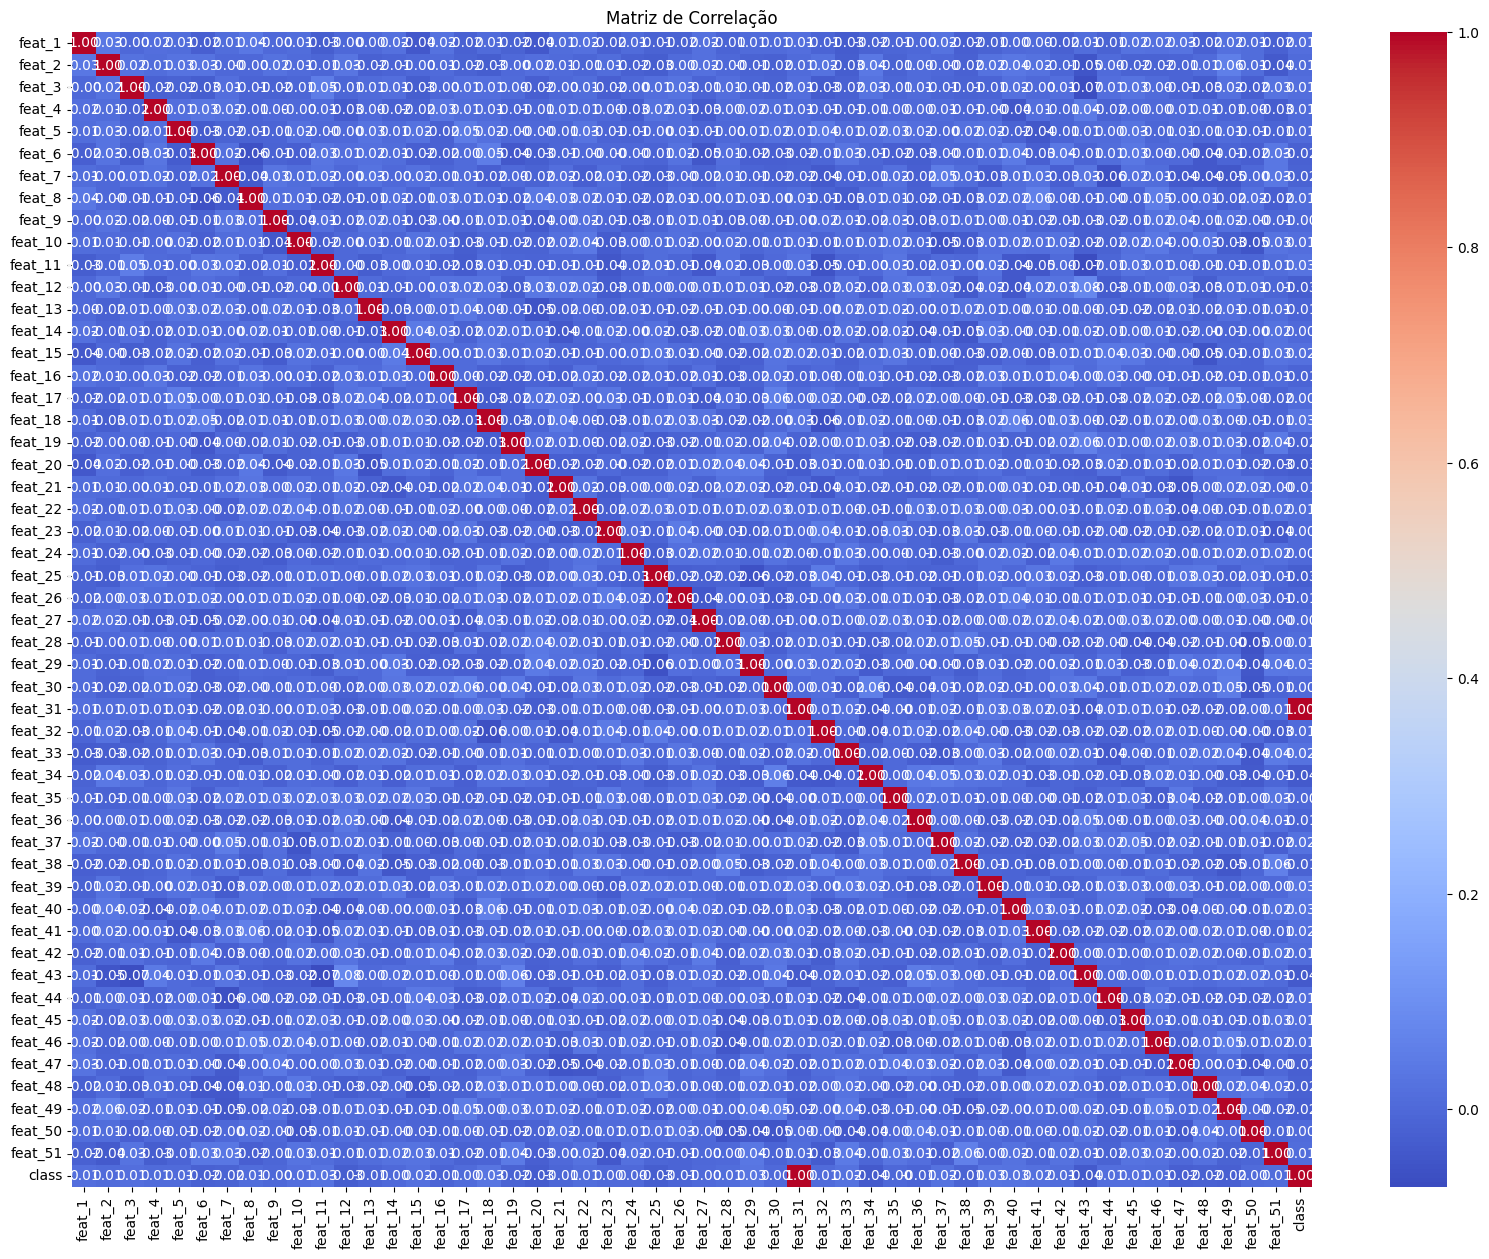

In [ ]:
# Calcular a matriz de correla√ß√£o
correlation_matrix = df.corr()

# Plotar o mapa de calor das correla√ß√µes
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correla√ß√£o")
plt.show()

Pode-se observar que a correla√ß√£o entre a covari√°vel "feat_31" e a vari√°vel resposta √© igual a 1, ent√£o faremos um gr√°fico de dispers√£o para entender melhor a rela√ß√£o entre elas.

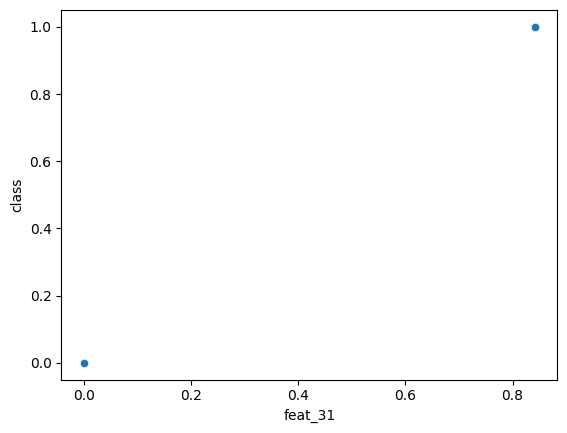

In [ ]:
sns.scatterplot(x=X["feat_31"], y=Y)
plt.show()

Pelo gr√°fico de dispers√£o, podemos observar que a covari√°vel "feat_31" √© quase igual a vari√°vel resposta, pois quando a resposta √© 0 a feat 31 tamb√©m √© 0, e quando a resposta √© 1, a feat 31 vale 0.8472. Portanto ela ser√° exclu√≠da da an√°lise

In [ ]:
X=X.drop(columns=["feat_31"])

## 4. Treino dos modelos

### 4.1 Separando os dados em treino, valida√ß√£o e teste

In [ ]:
# Separando os dados em 60% treino, 20% valida√ß√£o e 20% teste
X_train,X_rest,Y_train,Y_rest=train_test_split(X,Y,test_size=0.4,random_state=123)
X_val,X_test,Y_val,Y_test=train_test_split(X_rest,Y_rest,test_size=0.5,random_state=123)

### 4.2 Treinando um modelo de Regress√£o Log√≠stica

In [ ]:
modelo_escolhido=[]
auc_modelo=[]
precisao=[]
acuracia=[]
recall=[]
threshould_escolhido=[]
f1=[]

In [ ]:
logistica=LogisticRegression()
logistica.fit(X_train,Y_train)
Y_prob=logistica.predict_proba(X_val)[:,0]

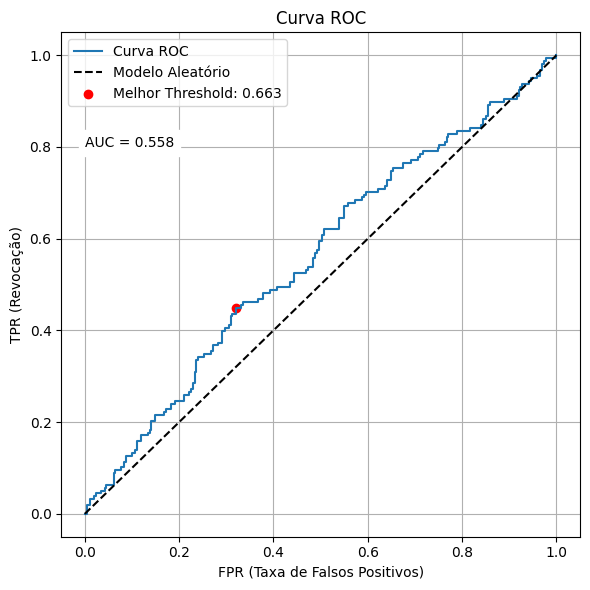

In [ ]:
fpr,tpr,thresholds=roc_curve(Y_val,Y_prob)
roc_auc=auc(fpr,tpr)
melhor_threshould=thresholds[np.argmax(tpr-fpr)]
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"Curva ROC")
plt.plot([0, 1], [0, 1], 'k--', label="Modelo Aleat√≥rio")
plt.scatter(fpr[np.argmax(tpr-fpr)], tpr[np.argmax(tpr-fpr)], color="red", label=f"Melhor Threshold: {melhor_threshould:.3f}")
plt.xlabel("FPR (Taxa de Falsos Positivos)")
plt.ylabel("TPR (Revoca√ß√£o)")
plt.title("Curva ROC")
plt.legend(loc="upper left")
plt.text(0,0.8,f"AUC = {roc_auc:.3f}",backgroundcolor="white",color="black")
plt.grid(True)
plt.tight_layout()
plt.show()

A partir do valor da AUC e da an√°lise da curva ROC, observa-se que o modelo de regress√£o log√≠stica n√£o apresentou um bom ajuste aos dados.

In [ ]:
Y_pred=(Y_prob>=melhor_threshould).astype(int)
modelo_escolhido.append("Regress√£o Log√≠stica")
auc_modelo.append(roc_auc)
precisao.append(precision_score(Y_val,Y_pred))
acuracia.append(accuracy_score(Y_val,Y_pred))
recall.append(recall_score(Y_val,Y_pred))
threshould_escolhido.append(melhor_threshould)
f1.append(f1_score(Y_val,Y_pred))

### 4.3 Treinando um modelo KNN

O n√∫mero de vizinhos que maximiza a acur√°cia √© 25


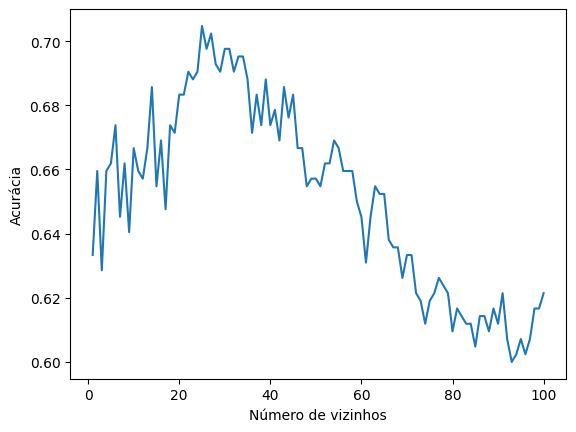

In [ ]:
acuracias_knn=[]
for i in range(1,101):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,Y_train)
  Y_pred=knn.predict(X_val)
  acuracias_knn.append(accuracy_score(Y_val,Y_pred))
plt.plot(range(1,101),acuracias_knn)
plt.xlabel("N√∫mero de vizinhos")
plt.ylabel("Acur√°cia")
n_vizinhos=np.argmax(acuracias_knn)+1
print(f"O n√∫mero de vizinhos que maximiza a acur√°cia √© {n_vizinhos}")

O n√∫mero de vizinhos que maximiza a acur√°cia √© 25

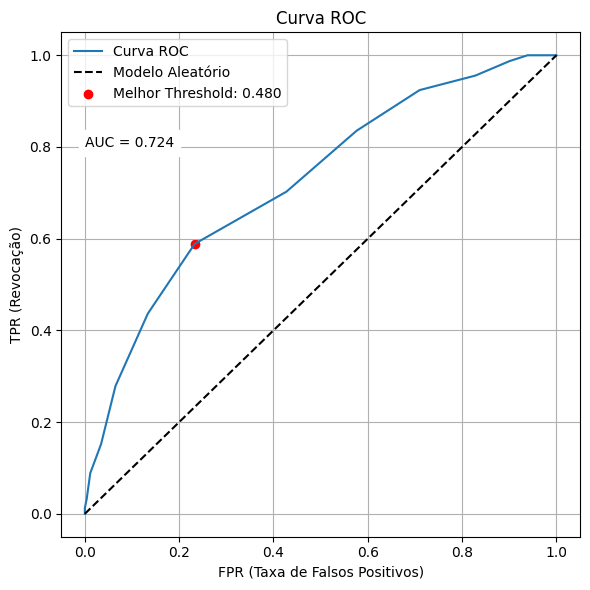

In [ ]:
knn=KNeighborsClassifier(n_neighbors=n_vizinhos)
knn.fit(X_train,Y_train)
Y_prob=knn.predict_proba(X_val)[:,1]
fpr,tpr,thresholds=roc_curve(Y_val,Y_prob)
roc_auc=auc(fpr,tpr)
melhor_threshould=thresholds[np.argmax(tpr-fpr)]
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"Curva ROC")
plt.plot([0, 1], [0, 1], 'k--', label="Modelo Aleat√≥rio")
plt.scatter(fpr[np.argmax(tpr-fpr)], tpr[np.argmax(tpr-fpr)], color="red", label=f"Melhor Threshold: {melhor_threshould:.3f}")
plt.xlabel("FPR (Taxa de Falsos Positivos)")
plt.ylabel("TPR (Revoca√ß√£o)")
plt.title("Curva ROC")
plt.legend(loc="upper left")
plt.text(0,0.8,f"AUC = {roc_auc:.3f}",backgroundcolor="white",color="black")
plt.grid(True)
plt.tight_layout()
plt.show()

A partir do valor da AUC e da an√°lise da curva ROC, observa-se que o modelo KNN com 25 vizinhos apresentou um ajuste razo√°vel aos dados, mas pode ser melhorado.

In [ ]:
Y_pred = (Y_prob >= melhor_threshould).astype(int)

# 4. Armazenando os resultados
modelo_escolhido.append(f"KNN com {n_vizinhos} vizinhos")
threshould_escolhido.append(melhor_threshould)
auc_modelo.append(auc(fpr, tpr))
acuracia.append(accuracy_score(Y_val, Y_pred))
precisao.append(precision_score(Y_val, Y_pred))
recall.append(recall_score(Y_val, Y_pred))
f1.append(f1_score(Y_val, Y_pred))

### 4.4 Treinando um modelo XGBoost

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       262
           1       0.93      0.80      0.86       158

    accuracy                           0.90       420
   macro avg       0.91      0.88      0.90       420
weighted avg       0.91      0.90      0.90       420

Accuracy: 0.9047619047619048


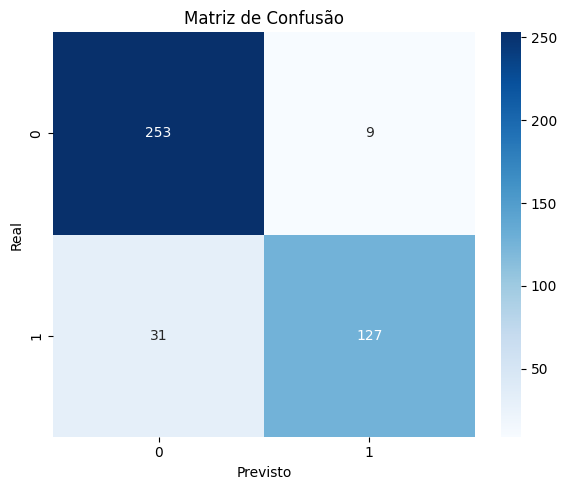

In [ ]:
# Modelo XGBoost
model = XGBClassifier(
    n_estimators=50,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

# Treinamento
model.fit(X_train, Y_train)

# Predi√ß√£o
Y_pred = model.predict(X_val)
Y_prob = model.predict_proba(X_val)[:, 1]
# Avalia√ß√£o
print("Classification Report:\n", classification_report(Y_val, Y_pred))
print("Accuracy:", accuracy_score(Y_val, Y_pred))

# Matriz de confus√£o
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(Y_val, Y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confus√£o")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

fpr,tpr,thresholds=roc_curve(Y_val,Y_prob)
modelo_escolhido.append("XGBoost")
threshould_escolhido.append(0.5)
auc_modelo.append(auc(fpr, tpr))
acuracia.append(accuracy_score(Y_val, Y_pred))
precisao.append(precision_score(Y_val, Y_pred))
recall.append(recall_score(Y_val, Y_pred))
f1.append(f1_score(Y_val, Y_pred))

A precis√£o, acur√°cia e estat√≠stica f1 do modelo foram altas, indicando que o modelo apresentou um bom ajuste aos dados.

### 4.5 Treinando modelos de √Årvore de Decis√£o, SVM com PCA e Gradient Boosting


In [ ]:
# SVM com PCA
pca = PCA(n_components=10)  # ou ajuste conforme vari√¢ncia explicada
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
svm_pca = SVC()

# Modelos a serem avaliados
models = {
    "√Årvore de Decis√£o": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM com PCA": svm_pca
}

# Avalia√ß√£o dos modelos
for name, model in models.items():
    print(f"üî∑ --- {name} ---")

    if name == "SVM com PCA":
        model.fit(X_train_pca, Y_train)
        Y_pred = model.predict(X_val_pca)
        Y_prob = model.decision_function(X_val_pca)
    else:
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_val)
        Y_prob = model.predict_proba(X_val)[:,1]

    acc = accuracy_score(Y_val, Y_pred)
    print(f"Acur√°cia: {acc:.4f}")
    print("Relat√≥rio de Classifica√ß√£o:")
    print(classification_report(Y_val, Y_pred))
    print("Matriz de Confus√£o:")
    print(confusion_matrix(Y_val, Y_pred))
    print("\n")
    fpr,tpr,thresholds=roc_curve(Y_val,Y_prob)
    modelo_escolhido.append(name)
    threshould_escolhido.append(0.5)
    auc_modelo.append(auc(fpr, tpr))
    acuracia.append(accuracy_score(Y_val, Y_pred))
    precisao.append(precision_score(Y_val, Y_pred))
    recall.append(recall_score(Y_val, Y_pred))
    f1.append(f1_score(Y_val, Y_pred))

üî∑ --- √Årvore de Decis√£o ---
Acur√°cia: 0.9524
Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       262
           1       0.93      0.95      0.94       158

    accuracy                           0.95       420
   macro avg       0.95      0.95      0.95       420
weighted avg       0.95      0.95      0.95       420

Matriz de Confus√£o:
[[250  12]
 [  8 150]]


üî∑ --- Gradient Boosting ---
Acur√°cia: 0.9643
Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       262
           1       0.93      0.97      0.95       158

    accuracy                           0.96       420
   macro avg       0.96      0.97      0.96       420
weighted avg       0.97      0.96      0.96       420

Matriz de Confus√£o:
[[251  11]
 [  4 154]]


üî∑ --- SVM com PCA ---
Acur√°cia: 0.7333
Relat√≥rio de Classifica√ß√£o:
              prec

A √Årvore de Decis√£o e o Gradient Boosting apresentaram m√©tricas altas, se adequando bem aos dados, enquanto o SVM com PCA apresentou m√©tricas razo√°veis, piores que os outros m√©todos

### 4.6 Treinando um modelo de Florestas Aleat√≥rias

In [ ]:
criterios = ['gini', 'entropy',"log_loss"]
features_maximas = ['sqrt', 'log2', None]
for i in criterios:
  for j in features_maximas:
    modelo=RandomForestClassifier(n_estimators=100,criterion=i,max_features=j)
    modelo.fit(X_train,Y_train)
    Y_prob=modelo.predict_proba(X_val)[:,1]
    fpr,tpr,thresholds=roc_curve(Y_val,Y_prob)
    melhor_threshould=thresholds[np.argmax(tpr-fpr)]
    threshould_escolhido.append(melhor_threshould)
    modelo_escolhido.append(f"Floresta Aleat√≥ria crit√©rio {i} e max_f {j}")
    auc_modelo.append(auc(fpr,tpr))
    Y_pred=(Y_prob>=melhor_threshould).astype(int)
    precisao.append(precision_score(Y_val,Y_pred))
    acuracia.append(accuracy_score(Y_val,Y_pred))
    recall.append(recall_score(Y_val,Y_pred))
    f1.append(f1_score(Y_val,Y_pred))


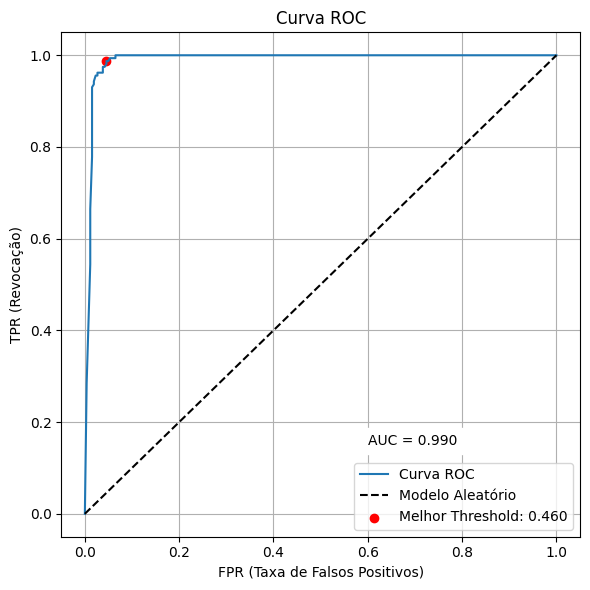

In [ ]:
modelo=RandomForestClassifier(criterion="entropy",max_features=None)
modelo.fit(X_train,Y_train)
Y_prob=modelo.predict_proba(X_val)[:,1]
fpr,tpr,thresholds=roc_curve(Y_val,Y_prob)
roc_auc=auc(fpr,tpr)
melhor_threshould=thresholds[np.argmax(tpr-fpr)]
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"Curva ROC")
plt.plot([0, 1], [0, 1], 'k--', label="Modelo Aleat√≥rio")
plt.scatter(fpr[np.argmax(tpr-fpr)], tpr[np.argmax(tpr-fpr)], color="red", label=f"Melhor Threshold: {melhor_threshould:.3f}")
plt.xlabel("FPR (Taxa de Falsos Positivos)")
plt.ylabel("TPR (Revoca√ß√£o)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.text(0.6,0.15,f"AUC = {roc_auc:.3f}",backgroundcolor="white",color="black")
plt.grid(True)
plt.tight_layout()
plt.show()

A partir do valor da AUC e da an√°lise da curva ROC, observa-se que o modelo de Florestas Aleat√≥rias apresentou um bom ajuste aos dados.

<Axes: title={'center': 'Gr√°fico de import√¢ncia das covari√°veis'}, xlabel='Covari√°veis', ylabel='Import√¢ncia'>

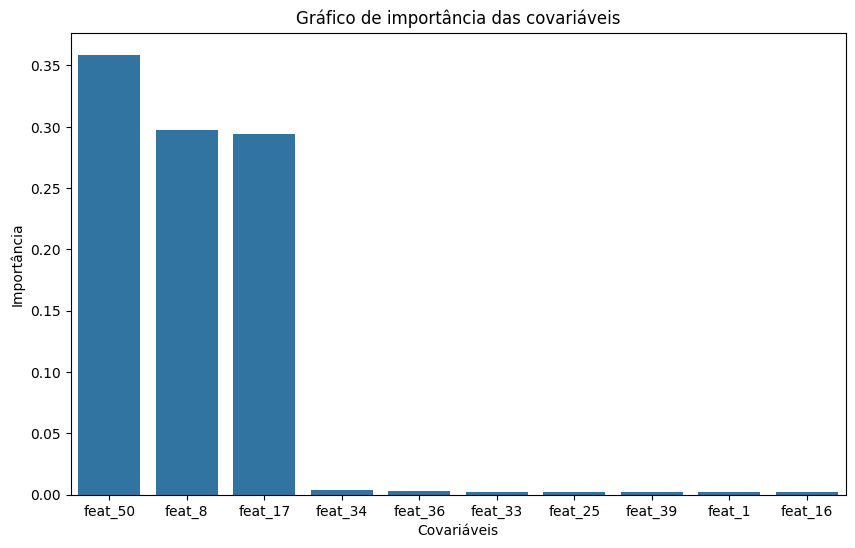

In [ ]:
importancias=pd.Series(modelo.feature_importances_,index=X_train.columns).sort_values(ascending=False)[0:10]
plt.figure(figsize=(10,6))
plt.xlabel("Covari√°veis")
plt.ylabel("Import√¢ncia")
plt.title("Gr√°fico de import√¢ncia das covari√°veis")
sns.barplot(x=importancias.index,y=importancias)

Pelo gr√°fico de Import√¢ncias, notamos que as feat 8, 17 e 50 se mostraram significantes para explicar a vari√°vel resposta.

### 4.7 Analisando a rela√ß√£o entre as covari√°veis feat_50, feat_8 e feat_17 com a vari√°veil resposta

In [ ]:
df_0=df[df["class"]==0]
df_1=df[df["class"]==1]

figura=go.Figure()
figura.add_trace(go.Scatter3d(x=df_0['feat_50'], y=df_0['feat_8'],z=df_0['feat_17'], mode='markers', marker=dict(color="royalblue"),name="Classe 0"))
figura.add_trace(go.Scatter3d(x=df_1['feat_50'], y=df_1['feat_8'],z=df_1['feat_17'], mode='markers', marker=dict(color="red"),name="Classe 1"))
figura.update_layout(
        title='',
        scene=dict(
            xaxis_title='feat_50',
            yaxis_title='feat_8',
            zaxis_title='feat_17'
        ),
        template='plotly_white',
        showlegend=True
    )
figura.show()

Pelo gr√°fico, podemos observar o comportamento entre as covari√°veis e a vari√°vel resposta. Nele, podemos ver camadas separadas entre as classes mostrando uma discrimina√ß√£o clara. Com isso, o modelo KNN apenas com estas 3 covari√°veis pode ser mais eficiente.

### 4.8 Regress√£o Log√≠stica apenas com as features 8, 17 e 50

In [ ]:
X_train_2=X_train[["feat_50","feat_8","feat_17"]]
X_val_2=X_val[["feat_50","feat_8","feat_17"]]
X_test_2=X_test[["feat_50","feat_8","feat_17"]]

In [ ]:
logistica=LogisticRegression()
logistica.fit(X_train_2,Y_train)
Y_prob=logistica.predict_proba(X_val_2)[:,0]

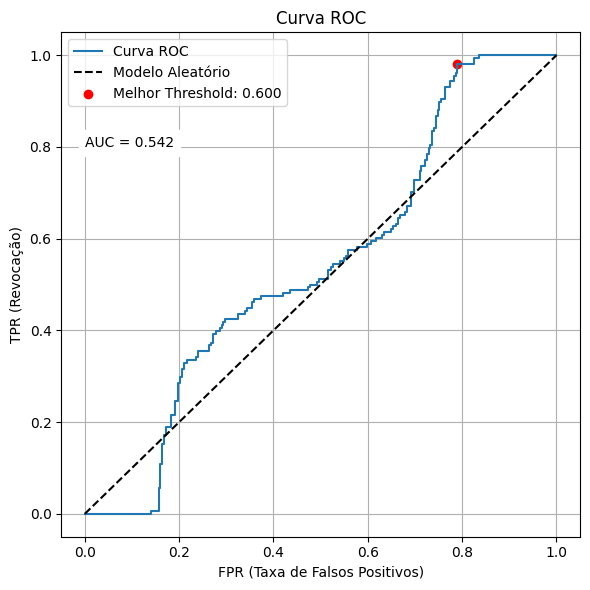

In [ ]:
fpr,tpr,thresholds=roc_curve(Y_val,Y_prob)
roc_auc=auc(fpr,tpr)
melhor_threshould=thresholds[np.argmax(tpr-fpr)]
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"Curva ROC")
plt.plot([0, 1], [0, 1], 'k--', label="Modelo Aleat√≥rio")
plt.scatter(fpr[np.argmax(tpr-fpr)], tpr[np.argmax(tpr-fpr)], color="red", label=f"Melhor Threshold: {melhor_threshould:.3f}")
plt.xlabel("FPR (Taxa de Falsos Positivos)")
plt.ylabel("TPR (Revoca√ß√£o)")
plt.title("Curva ROC")
plt.legend(loc="upper left")
plt.text(0,0.8,f"AUC = {roc_auc:.3f}",backgroundcolor="white",color="black")
plt.grid(True)
plt.tight_layout()
plt.show()

O desempenho da Regress√£o Log√≠stica utilizando apenas as 3 covari√°veis selecionadas anteriormente ficou ruim, e outros modelos apresentaram melhor desempenho.

In [ ]:
Y_pred = (Y_prob >= melhor_threshould).astype(int)

modelo_escolhido.append("Regress√£o Log√≠stica (df reduzido)")
threshould_escolhido.append(melhor_threshould)
auc_modelo.append(auc(fpr, tpr))
acuracia.append(accuracy_score(Y_val, Y_pred))
precisao.append(precision_score(Y_val, Y_pred))
recall.append(recall_score(Y_val, Y_pred))
f1.append(f1_score(Y_val, Y_pred))

### 4.9 KNN apenas com as features 8, 17 e 50

O n√∫mero de vizinhos que maximiza a acur√°cia √© 4


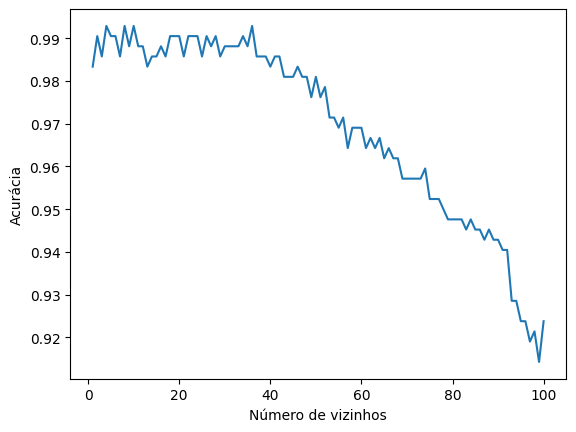

In [ ]:
acuracias_knn=[]
for i in range(1,101):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_2,Y_train)
  Y_pred=knn.predict(X_val_2)
  acuracias_knn.append(accuracy_score(Y_val,Y_pred))
plt.plot(range(1,101),acuracias_knn)
plt.xlabel("N√∫mero de vizinhos")
plt.ylabel("Acur√°cia")
n_vizinhos=np.argmax(acuracias_knn)+1
print(f"O n√∫mero de vizinhos que maximiza a acur√°cia √© {n_vizinhos}")

O n√∫mero de vizinhos que maximiza a acur√°cia √© o KNN com 4 vizinhos.

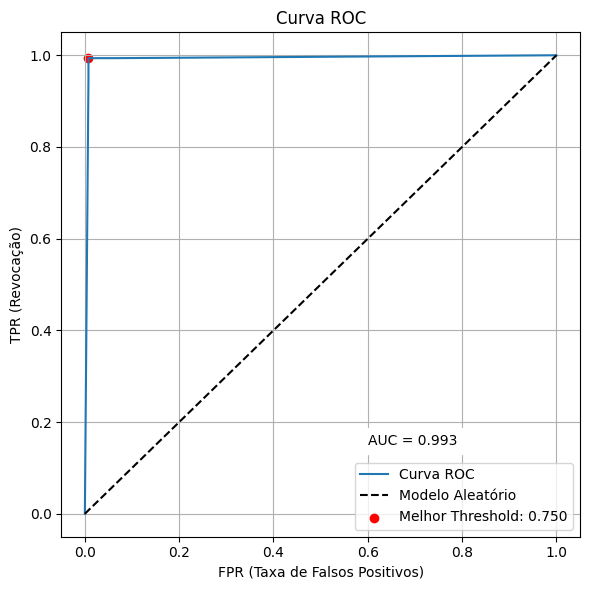

In [ ]:
knn=KNeighborsClassifier(n_neighbors=n_vizinhos)
knn.fit(X_train_2,Y_train)
Y_prob=knn.predict_proba(X_val_2)[:,1]
fpr,tpr,thresholds=roc_curve(Y_val,Y_prob)
roc_auc=auc(fpr,tpr)
melhor_threshould=thresholds[np.argmax(tpr-fpr)]
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"Curva ROC")
plt.plot([0, 1], [0, 1], 'k--', label="Modelo Aleat√≥rio")
plt.scatter(fpr[np.argmax(tpr-fpr)], tpr[np.argmax(tpr-fpr)], color="red", label=f"Melhor Threshold: {melhor_threshould:.3f}")
plt.xlabel("FPR (Taxa de Falsos Positivos)")
plt.ylabel("TPR (Revoca√ß√£o)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.text(0.6,0.15,f"AUC = {roc_auc:.3f}",backgroundcolor="white",color="black")
plt.grid(True)
plt.tight_layout()
plt.show()

A partir do valor da AUC e da an√°lise da curva ROC, observa-se que o modelo KNN com 4 vizinhos apresentou um ajuste muito bom aos dados.

In [ ]:
Y_pred = (Y_prob >= melhor_threshould).astype(int)

# Armazenando os resultados
modelo_escolhido.append(f"KNN com {n_vizinhos} vizinhos (df reduzido)")
threshould_escolhido.append(melhor_threshould)
auc_modelo.append(auc(fpr, tpr))
acuracia.append(accuracy_score(Y_val, Y_pred))
precisao.append(precision_score(Y_val, Y_pred))
recall.append(recall_score(Y_val, Y_pred))
f1.append(f1_score(Y_val, Y_pred))

## 5. Escolha do modelo

In [ ]:

pd.DataFrame({"Modelo":modelo_escolhido,"AUC":auc_modelo,"Threshold":threshould_escolhido,"Precis√£o":precisao,"Acur√°cia":acuracia,"Recall":recall,"F1":f1})

Modelo       AUC  Threshold  \
0                                 Regress√£o Log√≠stica  0.558484   0.663418   
1                                 KNN com 25 vizinhos  0.723621   0.480000   
2                                             XGBoost  0.971447   0.500000   
3                                   √Årvore de Decis√£o  0.951783   0.500000   
4                                   Gradient Boosting  0.987861   0.500000   
5                                         SVM com PCA  0.770920   0.500000   
6       Floresta Aleat√≥ria crit√©rio gini e max_f sqrt  0.877838   0.400000   
7       Floresta Aleat√≥ria crit√©rio gini e max_f log2  0.827773   0.370000   
8       Floresta Aleat√≥ria crit√©rio gini e max_f None  0.990047   0.390000   
9    Floresta Aleat√≥ria crit√©rio entropy e max_f sqrt  0.900437   0.430000   
10   Floresta Aleat√≥ria crit√©rio entropy e max_f log2  0.867584   0.420000   
11   Floresta Aleat√≥ria crit√©rio entropy e max_f None  0.990313   0.820000   
12  Floresta Aleat√≥ria crit√©rio log_loss e max_f sqrt  0.912008   0.440000   
13  Floresta Aleat√≥ria crit√©rio log_loss e max_f log2  0.863852   0.390000   
14  Floresta Aleat√≥ria crit√©rio log_loss e max_f None  0.989625   0.470000   
15                  Regress√£o Log√≠stica (df reduzido)  0.542081   0.600182   
16                   KNN com 4 vizinhos (df reduzido)  0.992680   0.750000   

    Precis√£o  Acur√°cia    Recall        F1  
0   0.458065  0.592857  0.449367  0.453674  
1   0.603896  0.700000  0.588608  0.596154  
2   0.933824  0.904762  0.803797  0.863946  
3   0.925926  0.952381  0.949367  0.937500  
4   0.933333  0.964286  0.974684  0.953560  
5   0.592742  0.733333  0.930380  0.724138  
6   0.661836  0.783333  0.867089  0.750685  
7   0.592437  0.728571  0.892405  0.712121  
8   0.923977  0.969048  1.000000  0.960486  
9   0.688119  0.804762  0.879747  0.772222  
10  0.660000  0.776190  0.835443  0.737430  
11  0.968153  0.973810  0.962025  0.965079  
12  0.722513  0.826190  0.873418  0.790831  
13  0.647887  0.773810  0.873418  0.743935  
14  0.928571  0.966667  0.987342  0.957055  
15  0.428177  0.500000  0.981013  0.596154  
16  0.987421  0.992857  0.993671  0.990536

Dentre os modelos avaliados, o KNN com 4 vizinhos, utilizando apenas as covari√°veis feat_8, feat_17 e feat_50, apresentou o maior valor de AUC, sendo, portanto, o que melhor se ajusta aos dados. Al√©m disso, as demais m√©tricas - recall, precis√£o, acur√°cia e F1-score - tamb√©m foram satisfat√≥rias, indicando que o modelo √© eficaz na classifica√ß√£o de novos clientes como bons ou maus pagadores. Assim, o modelo escolhido ser√° o KNN com 4 vizinhos utilizando as covari√°veis anteriores.

## 6. Avalia√ß√£o do modelo escolhido

Agora iremos calcular as m√©tricas do modelo escolhido no conjunto de teste

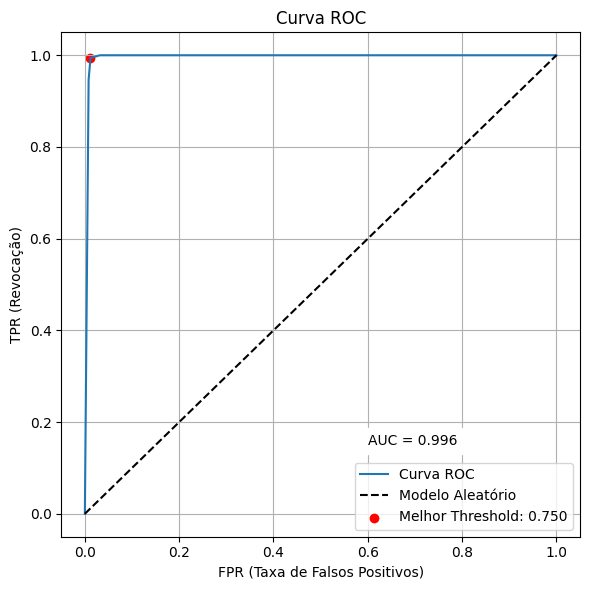

In [ ]:
knn=KNeighborsClassifier(n_neighbors=n_vizinhos)
knn.fit(X_train_2,Y_train)
Y_prob=knn.predict_proba(X_test_2)[:,1]
fpr,tpr,thresholds=roc_curve(Y_test,Y_prob)
roc_auc=auc(fpr,tpr)
melhor_threshould=0.75
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"Curva ROC")
plt.plot([0, 1], [0, 1], 'k--', label="Modelo Aleat√≥rio")
plt.scatter(fpr[np.argmax(tpr-fpr)], tpr[np.argmax(tpr-fpr)], color="red", label=f"Melhor Threshold: {melhor_threshould:.3f}")
plt.xlabel("FPR (Taxa de Falsos Positivos)")
plt.ylabel("TPR (Revoca√ß√£o)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.text(0.6,0.15,f"AUC = {roc_auc:.3f}",backgroundcolor="white",color="black")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
    Y_pred = (Y_prob >= melhor_threshould).astype(int)
    acc = accuracy_score(Y_test, Y_pred)
    print(f"Acur√°cia: {acc:.4f}")
    print("Relat√≥rio de Classifica√ß√£o:")
    print(classification_report(Y_test, Y_pred))
    print("Matriz de Confus√£o:")
    print(confusion_matrix(Y_test, Y_pred))

Acur√°cia: 0.9905
Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       251
           1       0.98      0.99      0.99       169

    accuracy                           0.99       420
   macro avg       0.99      0.99      0.99       420
weighted avg       0.99      0.99      0.99       420

Matriz de Confus√£o:
[[248   3]
 [  1 168]]


## 7. Conclus√£o

O modelo escolhido continuou apresentando √≥timos resultados preditivos no conjunto de teste, com todas as m√©tricas muito pr√≥ximas de 1, errando apenas 4 predi√ß√µes. Assim, este modelo √© eficaz em classificar novos clientes como bons ou maus pagadores, reduzindo a taxa de Inadimpl√™ncia e aumentando o lucro do nosso cliente.